# Decision-making maps for understanding the data characteristics
This file deals with the following decision-making maps:
* One variable as inputs
    * Visual understanding
        * Histrgam
        * Bar chart
    * Numerical understanding
        * Mean
        * Median
        * Standard deviation
* Two variables as inputs
    * Visual understanding
        * Scatter plot
        * Histogram stratified by qualitative variables
        * Stacked bar chart    
    * Numerical understanding
        * Correlation coefficient
        * Mean stratified by qualitative variables
        * Median stratified by qualitative variables
        * Standard deviation stratified by qualitative variables
    * Understanding by Table
        * Contingency table  
* Three variables as inputs
    * Visual understanding
        * Scatter graph stratified by qualitative variables
    * Numerical understanding
        * Correlation coefficient stratified by qualitative variables

__Precautions__
* In the following explanations, the order of the explanations does not correspond to the previous descriptions since several decision-making maps may be treated at the same time.

## Load data
__First, let's check the basic information about each variable in the data.__

__Example__
* Unit
* Whether quantitative or qualitative variables
* (for qualitative variables) What values do they have?*

\* Quantitative variables can be checked in the histograms and scatter plots described below.

### Data on used homes  
sample size: 300\
price (unit: millions of yen)\
area (unit: ${\rm m}^2$)\
age: age of building (unit: year)\
walking: walking time from the closest station (unit: minutes)\
structure: building structure (RC: reinforced concrete, W: wooden)\
sunlight (good, bad)

In [2]:
%matplotlib inline

# Import Modules
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
# Put real_estate.csv in the same folder as this file
df = pd.read_csv('real_estate.csv')
display(df)

,area,age,walking,structure,sunlight,price
0,85,31,6,RC,Bad,13.4
1,130,22,19,RC,Good,28.2
2,85,6,4,W,Bad,29.1
3,80,9,10,W,Good,27.2
4,90,22,9,RC,Good,26.1
...,...,...,...,...,...,...
294,50,18,7,W,Good,5.0
295,85,20,12,RC,Good,29.2
296,85,11,8,RC,Bad,28.0
297,100,29,9,RC,Good,25.1


## Histogram and scatter graph
__Supplementary information__ Sturges' rule is one of the methods used to determine the bin width of a histogram.

__Sturges' rule__  
When the number of observables is $n$ and the number of bins is $k$, the following formula is given.

$\quad k=1+\log_2 n = 1+\frac{\log_{10} n}{\log_{10} 2}$

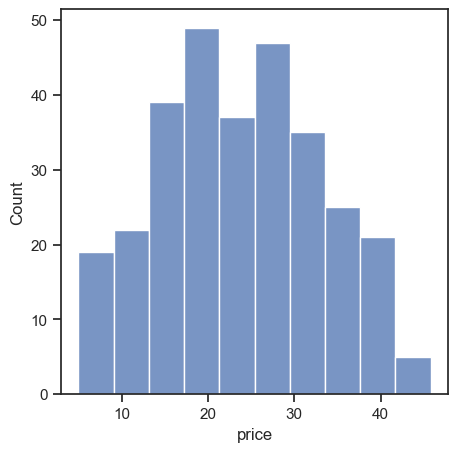

In [3]:
# Set graph themes
sns.set_theme(style='ticks')

# Histgram of price
# histplot()
#   Parameters:
#     bins : the number of intervals
#     binwidth: interval width
# To adjust the number of bins and bin width, use the parameters of histplot(). See below for details.
# seaborn.histplot - seaborn documentation
# URL: https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='price')
plt.show()

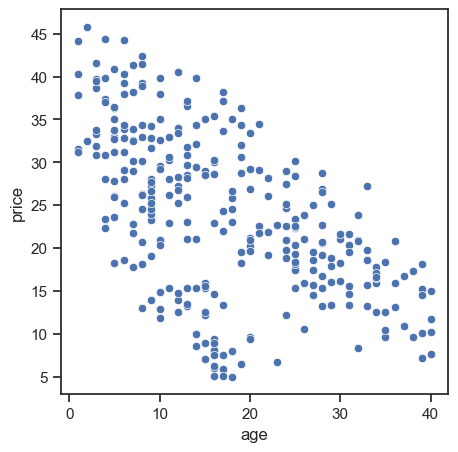

In [12]:
# Scatter plot of age and price
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='age', y='price')
plt.show()

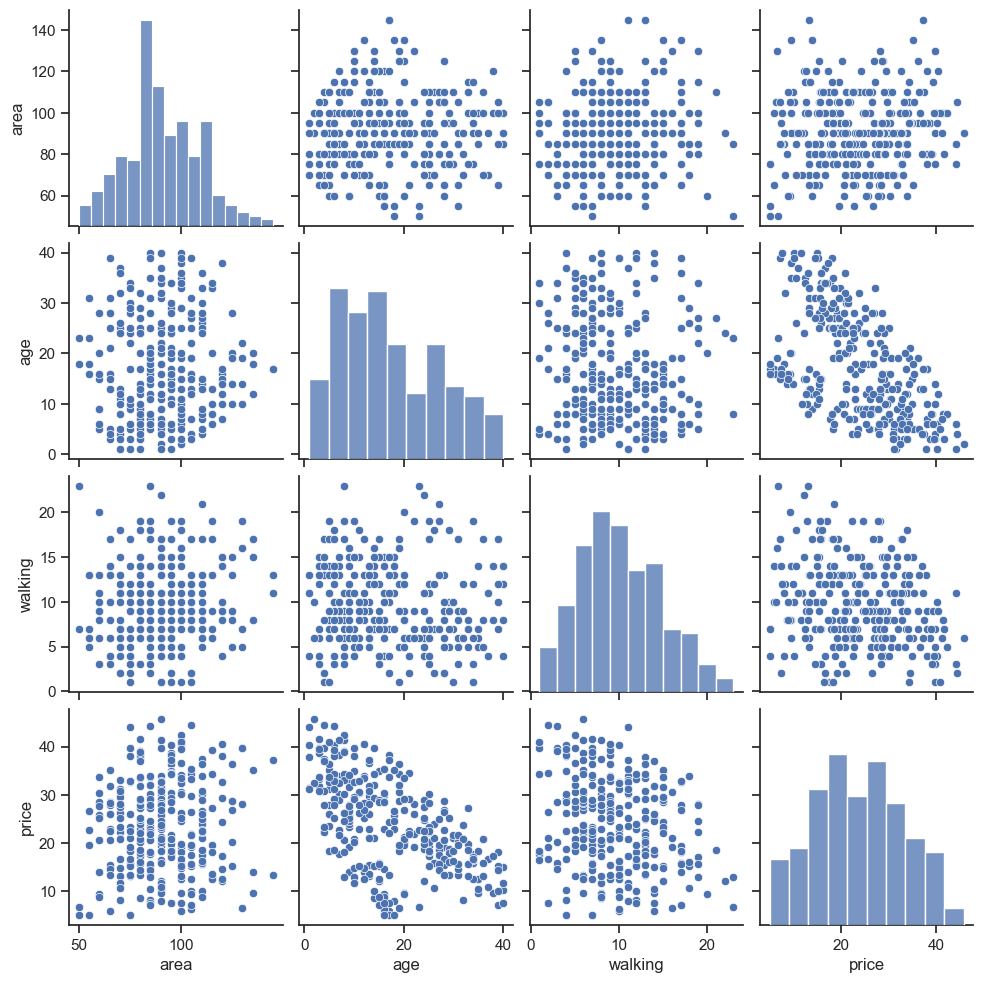

In [5]:
# Histogram and scatter plot
sns.pairplot(df)
plt.show()

## Bar graph

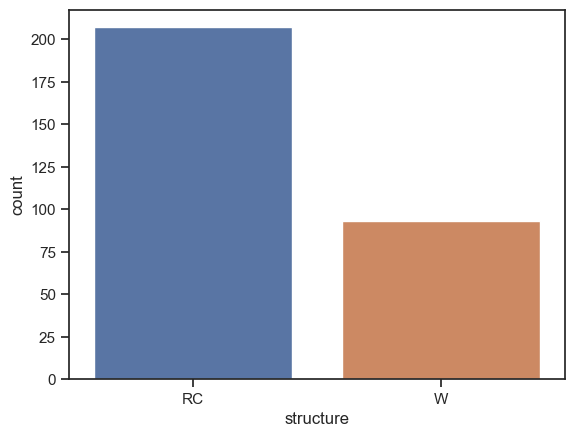

In [9]:
# Bar chart of structure
sns.countplot(data=df, x='structure')
plt.show()

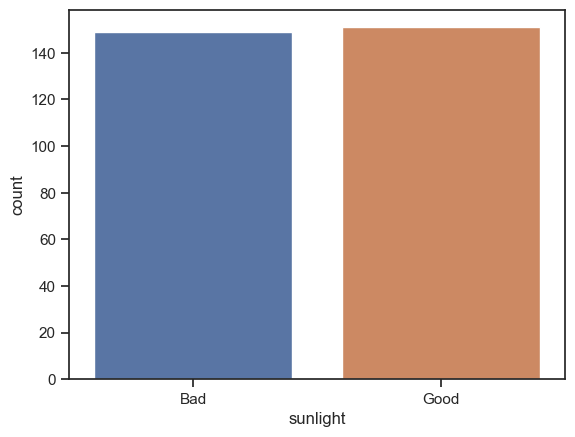

In [10]:
# Bar chart of sunlight
sns.countplot(data=df, x='sunlight')
plt.show()

## Mean, Median, Standard deviation
mean\
50%: Median\
std: Standard deviation

In [4]:
# Mean, Median, Standard deviation
display(df.describe())

,area,age,walking,price
count,300.000000,300.000000,300.000000,300.000000
mean,90.150000,17.350000,9.690000,23.818333
std,21.060373,10.271604,4.581543,9.423682
min,-95.000000,1.000000,1.000000,5.000000
25%,80.000000,9.000000,6.000000,16.425000
50%,90.000000,16.000000,9.000000,23.350000
75%,100.000000,25.000000,13.000000,30.825000
max,145.000000,40.000000,23.000000,45.800000


## Histgram and scatter graph stratified by qualitative variables

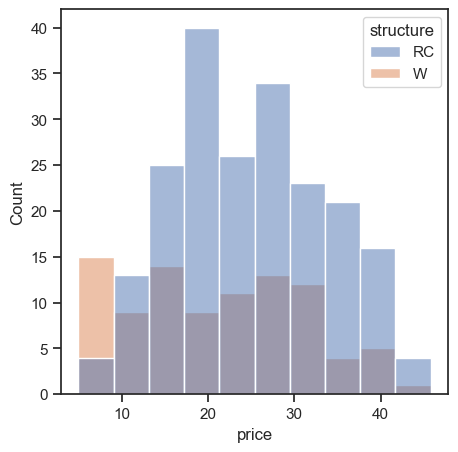

In [14]:
# Histogram of price stratified by structure
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='price', hue='structure')
plt.show()

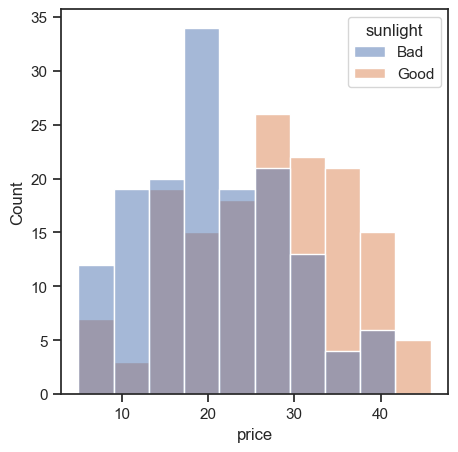

In [15]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='price', hue='sunlight')
plt.show()

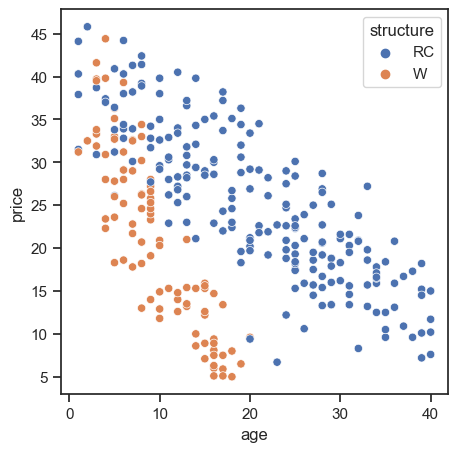

In [12]:
# Scatter plot of age and price stratified by structure
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='age', y='price', hue='structure')
plt.show()

C:\Users\marim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

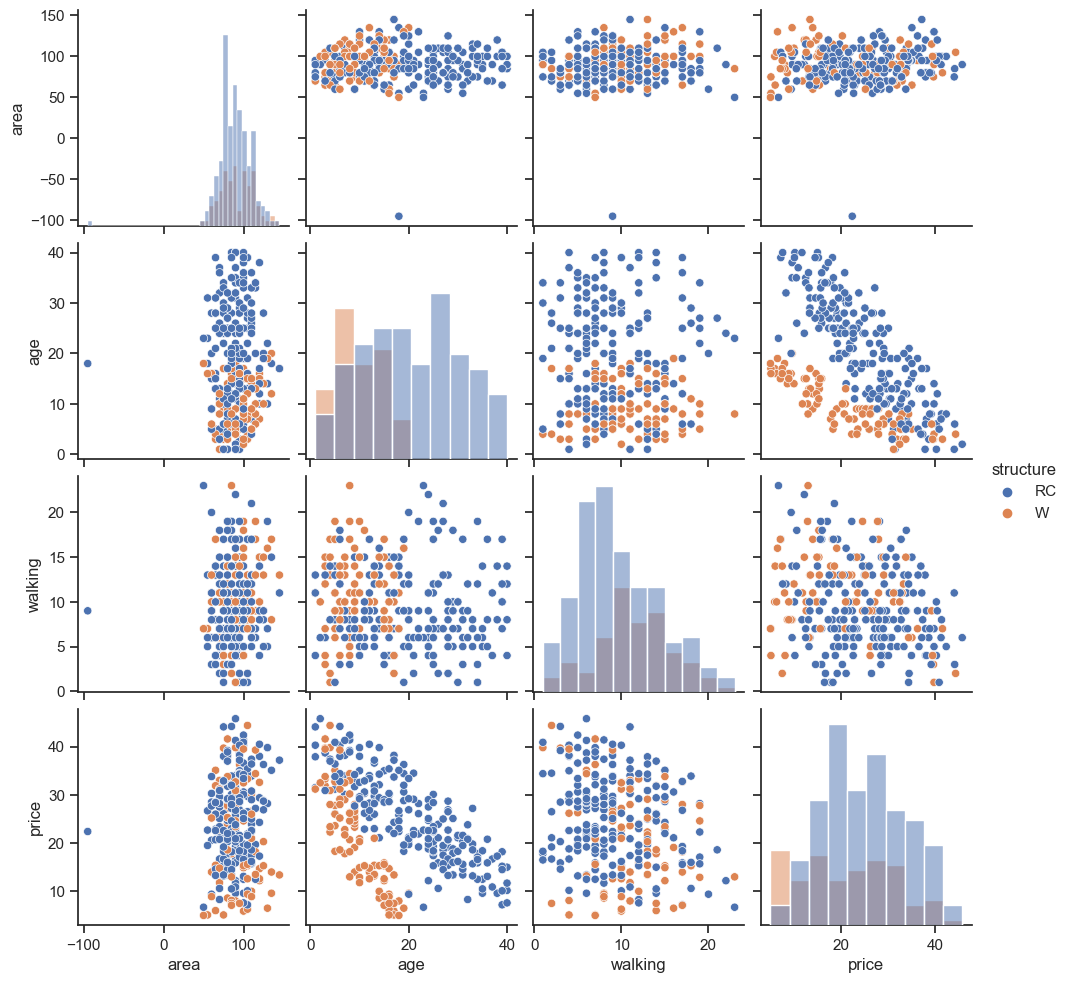

In [13]:
# Histogram and scatter plot stratified by qualitative variables
# pairplot()
#   Parameters:
#     hue: Variable name for stratification
#     diag_kind: Type of graph located on the diagonal
sns.pairplot(df, hue='structure', diag_kind='hist')
plt.show()

## Contingency table

In [6]:
# Contingency table of structure and sunlight
ct = pd.crosstab(df['structure'], df['sunlight'])
display(ct)

sunlight,Bad,Good
structure,,
RC,108,99
W,41,52


## Band chart

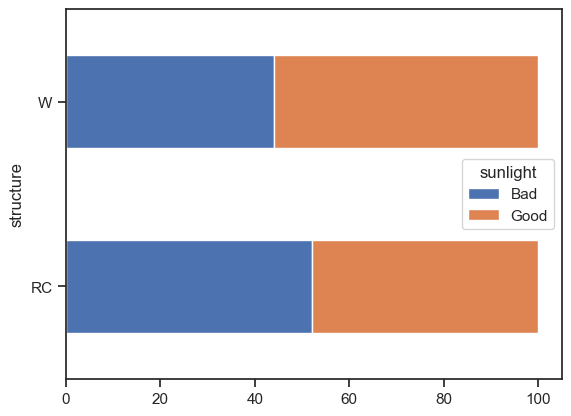

In [9]:
# Create a contingency table expressed in relative frequencies for each structure
ct = pd.crosstab(df['structure'], df['sunlight'], normalize='index')
ct = ct * 100

# Stacked bar chart
ct.plot.barh(stacked=True)
plt.show()

## Correlation coefficient

In [10]:
# Correlation coefficient
display(df.corr(numeric_only=True))

,area,age,walking,price
area,1.000000,0.027817,0.056116,0.068168
age,0.027817,1.000000,-0.122199,-0.573124
walking,0.056116,-0.122199,1.000000,-0.218508
price,0.068168,-0.573124,-0.218508,1.000000


## Mean, median, and standard deviation stratified by qualitative variables

In [11]:
# Mean, median, and standard deviation stratified by structure
display(df.groupby('structure').describe().T)

# Mean, median, and standard deviation stratified by sunlight
display(df.groupby('sunlight').describe().T)

structure              RC           W
area    count  207.000000   93.000000
        mean    89.082126   92.526882
        std     21.494592   19.967687
        min    -95.000000   50.000000
        25%     80.000000   80.000000
        50%     90.000000   90.000000
        75%    100.000000  105.000000
        max    145.000000  145.000000
age     count  207.000000   93.000000
        mean    20.806763    9.655914
        std     10.203338    4.801482
        min      1.000000    1.000000
        25%     13.000000    6.000000
        50%     21.000000    9.000000
        75%     28.500000   14.000000
        max     40.000000   20.000000
walking count  207.000000   93.000000
        mean     9.144928   10.903226
        std      4.623522    4.265801
        min      1.000000    1.000000
        25%      6.000000    8.000000
        50%      8.000000   11.000000
        75%     12.000000   14.000000
        max     23.000000   23.000000
price   count  207.000000   93.000000
        mean    24.975362   21.243011
        std      8.810024   10.252257
        min      6.700000    5.000000
        25%     18.350000   13.000000
        50%     24.600000   21.000000
        75%     31.350000   29.100000
        max     45.800000   44.400000

sunlight              Bad        Good
area    count  149.000000  151.000000
        mean    90.402685   89.900662
        std     22.865033   19.187411
        min    -95.000000   50.000000
        25%     80.000000   80.000000
        50%     90.000000   90.000000
        75%    105.000000  100.000000
        max    135.000000  145.000000
age     count  149.000000  151.000000
        mean    18.073826   16.635762
        std     10.335647   10.191816
        min      1.000000    1.000000
        25%     10.000000    8.000000
        50%     16.000000   15.000000
        75%     26.000000   25.000000
        max     40.000000   40.000000
walking count  149.000000  151.000000
        mean     8.872483   10.496689
        std      4.516170    4.516450
        min      1.000000    1.000000
        25%      6.000000    7.000000
        50%      8.000000   10.000000
        75%     12.000000   14.000000
        max     23.000000   21.000000
price   count  149.000000  151.000000
        mean    20.628188   26.966225
        std      8.427385    9.319935
        min      5.100000    5.000000
        25%     13.500000   20.650000
        50%     19.800000   27.500000
        75%     27.700000   33.850000
        max     40.900000   45.800000

## Correlation coefficient stratified by qualitative variables

In [12]:
# Correlation coefficient stratified by structure
display(df.groupby('structure').corr(numeric_only=True).T)

# Correlation coefficient stratified by sunlight
display(df.groupby('sunlight').corr(numeric_only=True).T)

structure        RC                                       W            \
               area       age   walking     price      area       age   
area       1.000000  0.047218  0.007939  0.155931  1.000000  0.241582   
age        0.047218  1.000000 -0.039638 -0.828299  0.241582  1.000000   
walking    0.007939 -0.039638  1.000000 -0.193034  0.136254 -0.040383   
price      0.155931 -0.828299 -0.193034  1.000000 -0.064385 -0.865556   

structure                      
            walking     price  
area       0.136254 -0.064385  
age       -0.040383 -0.865556  
walking    1.000000 -0.193838  
price     -0.193838  1.000000

sunlight       Bad                                    Good            \
              area       age   walking     price      area       age   
area      1.000000 -0.000270  0.063971  0.097351  1.000000  0.059814   
age      -0.000270  1.000000 -0.166698 -0.596068  0.059814  1.000000   
walking   0.063971 -0.166698  1.000000 -0.269983  0.054039 -0.056872   
price     0.097351 -0.596068 -0.269983  1.000000  0.056200 -0.576911   

sunlight                      
           walking     price  
area      0.054039  0.056200  
age      -0.056872 -0.576911  
walking   1.000000 -0.328173  
price    -0.328173  1.000000